<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/EDA/01_workshop_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diccionario de datos**
---
- `Name`: nombre de la ventana de tiempo.
- `Netflows`: cantidad de netflows en la ventana de tiempo.
- `First_Protocol`: top 1 de protocolos usados en la ventana de tiempo.
- `Second_Protocol`: top 2 de protocolos usados en la ventana de tiempo.
- `Third_Protocol`: top 3 de protocolos usados en la ventana de tiempo.
- `p1_d`: 25% de los percentiles de todas las duraciones en la ventana de tiempo
- `p2_d`: 50% de los percentiles de todas las duraciones en la ventana de tiempo
- `p3_d`: 75% de los percentiles de todas las duraciones en la ventana de tiempo
- `duration`: duración total de la ventana de tiempo
- `max_d`: valor máximo de todas las duraciones en la ventana de tiempo.
- `min_d`: valor mínimo de todas las duraciones en la ventana de tiempo.
- `#packets`: número total de paquetes en la ventana de tiempo.
- `Avg_bps`: promedio de bits por segundo en la ventana de tiempo.
- `Avg_pps`: promedio de paquetes por segundo en la ventana de tiempo.
- `Avg_bpp`: promedio de bytes por paquete en la ventana de tiempo.
- `#Bytes`: número total de bytes en la ventana de tiempo.
- `#sp`: número total de puertos de origen usados en la ventana de tiempo.
- `#dp`: número total de puertos de destino usados en la ventana de tiempo.
- `first_sp`: top 1 de los puertos de origen en la ventana de tiempo.
- `second_sp`: top 2 de los puertos de origen en la ventana de tiempo.
- `third_sp`: top 3 de los puertos de origen en la ventana de tiempo.
- `first_dp`: top 1 de los puertos de destino en la ventana de tiempo.
- `second_dp`: top 2 de los puertos de destino en la ventana de tiempo.
- `third_dp`: top 3 de los puertos de destino en la ventana de tiempo.
- `p1_ip`: 25% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p2_ip`: 50% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p3_ip`: 75% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p1_ib`: 25% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `p2_ib`: 50% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `p3_ib`: 75% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `Type`: tipo de ventana de tiempo
  - `benignas`: 0
  - `bitcash`: 1
  - `bitcoin`: 2
  - `ethereum `: 3
  - `monero`: 4
  - `litecoin`: 5


# **Contexto**
---

El software de minería puede usarse en forma de malware, para que un cibercriminal mine con los recursos de una víctima, lo cual puede ser costoso en energía eléctrica y en hardware, ya que minar puede degradarlo. Por lo anterior, se resalta que las muestras de los mineros fueron realizados en ambientes seguros y con duración de 5 minutos por ejecución.

Se utilizó un esnifer como Wireshark, del cual se obtuvieron archivos en formato pcaps, los cuales fueron procesados por una sonda llamada netfdump, para extraer la información. Esa información venía por flujos relacionados al archivo PCAPS, por lo tanto, se aplicó un concepto de ventana de tiempos de trabajos relacionados con botnes, para resumir estos flujos.

# **Conceptos**
---

- **Prueba de trabajo** problema matemático (no útil) que se debe resolver para minar una criptomoneda. Por cada moneda descubierta debe aumentar la complejidad.

- **flujo** conexión y transferencia de información entre un emisor y receptor.

- **Ventanas de tiempo**: resumen de flujos de red, en este conjunto de datos cada registro es un resumen de flujos por archivo. Un archivo **pcap** puede tener mas de un grupos de flujos.



# **Functions**

In [ ]:
def porcent_feature_nan(data):
  print(f'Columnas con valores faltantes')
  avaliable = data.isnull()
  avaliable = avaliable.apply(pd.Series.value_counts).fillna(0).T
  avaliable = avaliable[avaliable[True]>0][True]
  for i , j in enumerate(avaliable.index):
    porce_second_pr = np.round(avaliable[i] / data.shape[0], 3) * 100
    print(colored(f"""El porcentaje de los datos faltantes de la columna {j} con respecto 
    al número total de registros es de {porce_second_pr}%.\n""", attrs=['bold']))
    print("Número de registros faltantes por características")
  return avaliable

In [ ]:
def type_data_feature(data):
  data_numeric = (data.dtypes == "int64") | (data.dtypes == "float64")
  data_object  = (data.dtypes == "object")
  data_numeric = [c for c in data_numeric.index if data_numeric[c]]
  data_object = [c for c in data_object.index if data_object[c]]
  print(colored(f"""Contamos con {len(data_numeric)} características cuantitativas y 
  {len(data_object)} categoricas \n""", attrs=['bold']))

  return data_numeric, data_object

In [ ]:
def plot_bars(data, title: str= 'feature', x_size:int=6, y_size:int=5, 
              font_size:int=15):
  fig, ax = plt.subplots(figsize = (x_size, y_size))
  fig.suptitle(f'Count plot {title}', fontsize = font_size)
  sns.countplot(x = data, ax = ax)
  len_data = data.shape[0]

  for p in ax.patches:
    height = int(p.get_height())
    porc = '{0:.2f}%'.format(height/len_data)
    plt.text(p.get_x()+p.get_width()/2., height-height*0.05, porc, ha="center", backgroundcolor='y')

#**Librerias**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from termcolor import colored

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler



# **Información preliminar**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Kaiziferr/datasets/main/cryptojacking.csv').drop('Unnamed: 0', axis = 1)
data.drop('Name', inplace=True, axis = 1)

In [ ]:
data['Type'] = data['Type'].map({0:'benigno', 1:'bitcash',2:'bitcoin',3:'ethereum',4:'monero',5:'litecoin'})

In [ ]:
print(colored(f'El conjunto de datos consta de {len(data.index)} registros y {len(data.columns)} columnas',  attrs=['bold']))

El conjunto de datos consta de 2837 registros y 30 columnas


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Netflows         2837 non-null   int64  
 1   First_Protocol   2837 non-null   object 
 2   Second_Protocol  619 non-null    object 
 3   Third_Protocol   26 non-null     object 
 4   p1_d             2837 non-null   float64
 5   p2_d             2837 non-null   float64
 6   p3_d             2837 non-null   float64
 7   duration         2837 non-null   float64
 8   max_d            2837 non-null   float64
 9   min_d            2837 non-null   float64
 10  #packets         2837 non-null   int64  
 11  Avg_bps          2837 non-null   int64  
 12  Avg_pps          2837 non-null   int64  
 13  Avg_bpp          2837 non-null   int64  
 14  #Bytes           2837 non-null   int64  
 15  #sp              2837 non-null   int64  
 16  #dp              2837 non-null   int64  
 17  first_sp      

**Inspección Datos Faltantes**


In [ ]:
porcent_feature_nan(data)

Columnas con valores faltantes
El porcentaje de los datos faltantes de la columna Second_Protocol con respecto 
    al número total de registros es de 78.2%.

Número de registros faltantes por características
El porcentaje de los datos faltantes de la columna Third_Protocol con respecto 
    al número total de registros es de 99.1%.

Número de registros faltantes por características
El porcentaje de los datos faltantes de la columna second_sp con respecto 
    al número total de registros es de 0.8%.

Número de registros faltantes por características
El porcentaje de los datos faltantes de la columna third_sp con respecto 
    al número total de registros es de 72.2%.

Número de registros faltantes por características
El porcentaje de los datos faltantes de la columna second_dp con respecto 
    al número total de registros es de 0.8%.

Número de registros faltantes por características
El porcentaje de los datos faltantes de la columna third_dp con respecto 
    al número total de regi

Second_Protocol    2218.0
Third_Protocol     2811.0
second_sp            22.0
third_sp           2049.0
second_dp            22.0
third_dp           2052.0
Name: True, dtype: float64

---
- La columna Third_Protocol presenta aproximadamente un 99% de datos faltantes, es recomendable eliminarla.

- La columna Second_Protocol presenta aproximadamente un 78.2% de datos faltantes, habria que validar si la característica influye en los datos con respecto al uso de los datos, ya que se puede explorar metodos de imputación, o como último recurso eliminar la columna.

- El segundo puerto de origen y el segundo puerto de destino más usado, tienen una proporción mínima del 8% cada uno, pueden eliminarse o imputarse. 

- El tercer puerto de origen y el tercer puerto de destino presentan un porcentaje alto de datos, faltantes.
---

**Inspección del tipo de variables**

In [ ]:
data_numeric, data_object = type_data_feature(data)

Contamos con 26 características cuantitativas y 
  4 categoricas 



---
- La variable `Name` no aporta información es solo referencia al archivo
- second_dp  y third_dp hacen referencia a un valor cuantitativo

---

# **Análisis Univariado**

In [ ]:
# Transformaciones preliminares
data['second_dp'] = data['second_dp'].astype('int64',  errors='ignore')
data['third_dp'] = data['third_dp'].astype('int64',  errors='ignore')

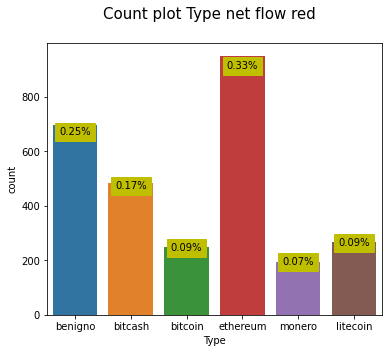

In [ ]:
plot_bars(data['Type'], 'Type net flow red')

---
- El conjunto no está balanceado
- La categoría con más registro es ethereum
- La categoría con menos registro es monero
- Se puede utilizar todos los registros de naturaleza minera para identificar el tráfico de una de las criptomonedas estudiadas
- El 75% de los registros son de naturaleza maligna
- El 25% son de naturaleza benigna
---

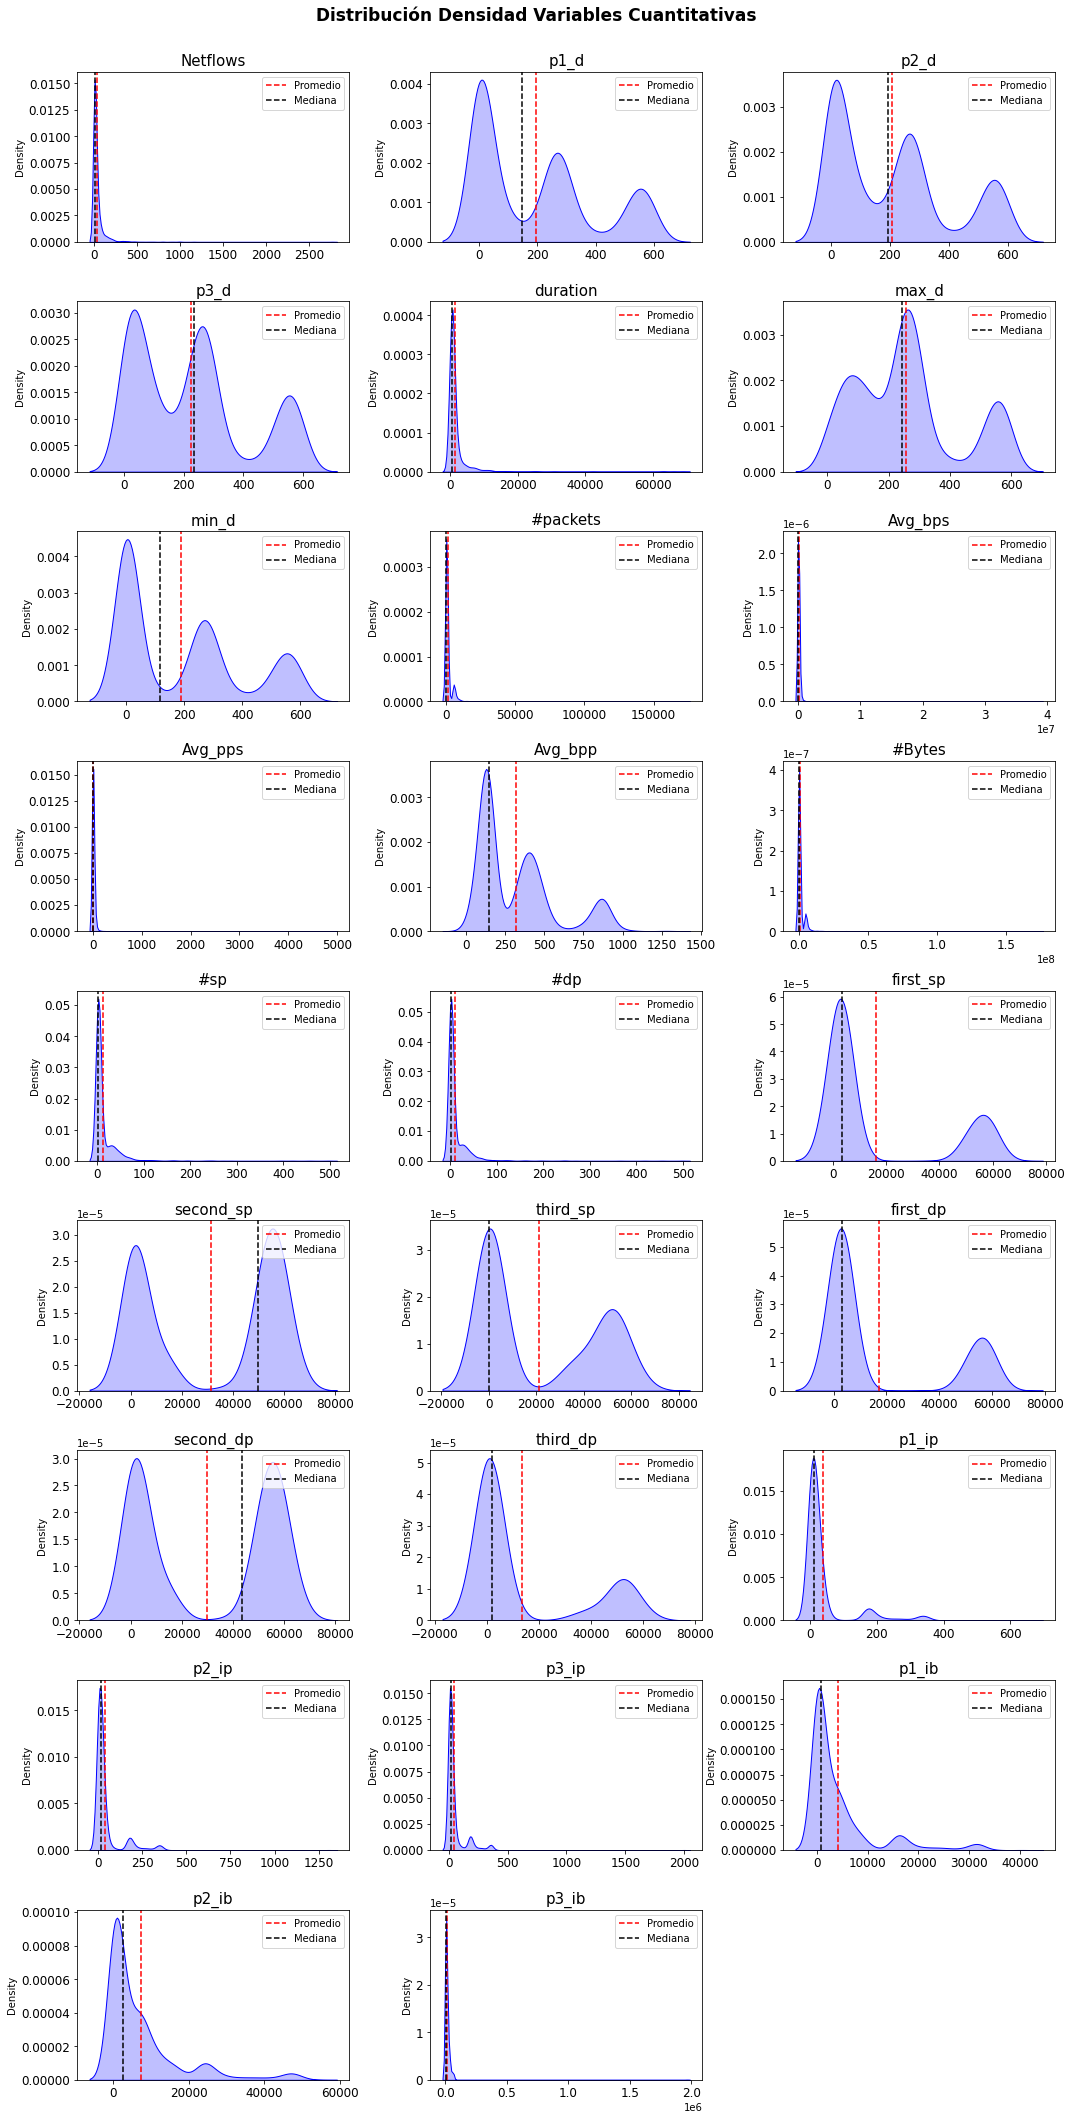

In [ ]:
fig, ax = plt.subplots(nrows = 9, ncols = 3, figsize = (15,30))
ax = ax.flat
for i, col in enumerate(data_numeric):
    sns.kdeplot(data[col], color='blue', shade=True, ax = ax[i])
    ax[i].axvline(data[col].mean(), c='r', linestyle = '--', label = 'Promedio')
    ax[i].axvline(data[col].median(), c='black', linestyle = '--', label = 'Mediana')
    
    ax[i].set_title(col, size = 15)
    ax[i].tick_params(labelsize = 12)
    ax[i].set_xlabel("", size=9)
    ax[i].legend()
    
fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribución Densidad Variables Cuantitativas', fontsize = 17, fontweight = "bold");
fig.delaxes(ax[26])

In [ ]:
informe_asimetria_kurtosis = pd.DataFrame(columns = data_numeric, index = ['Coeficiente_Asimetria','Coeficiente_Curtosis'])
for i in data_numeric:
    temp = []
    temp.append(data[i].skew())
    temp.append(data[i].kurt())
    informe_asimetria_kurtosis[i] = temp
informe_asimetria_kurtosis.T

,Coeficiente_Asimetria,Coeficiente_Curtosis
Netflows,12.802989,289.551858
p1_d,0.652578,-0.916040
p2_d,0.629371,-0.857819
p3_d,0.602541,-0.781011
duration,10.769105,170.409783
max_d,0.558040,-0.579730
min_d,0.652776,-0.961349
#packets,22.744152,807.723052
Avg_bps,49.448632,2555.869855
Avg_pps,35.637847,1462.574877


- #Bytes	son asimetrica positiva 
- #packets son asimetrica positiva
- Netflows son asimetrica positiva
- Las caracteristicas con forma leptocurtica (alta concentración de los valores cerca a su media) son las siguientes: Netflow, duration, packetsm Avg_bps, Avg_pps, Bytes, #sp, #dp, p1_ip, p2_ip, p3_ip y p1_ib, p2_ib, p3_ib

# **Análisis Bivariado**

In [ ]:
first_group = data.groupby([data_object[0],'Type']).size().reset_index(name = 'Observaciones')
second_group = data.groupby([data_object[1],'Type']).size().reset_index(name = 'Observaciones')
third_group = data.groupby([data_object[2],'Type']).size().reset_index(name = 'Observaciones')

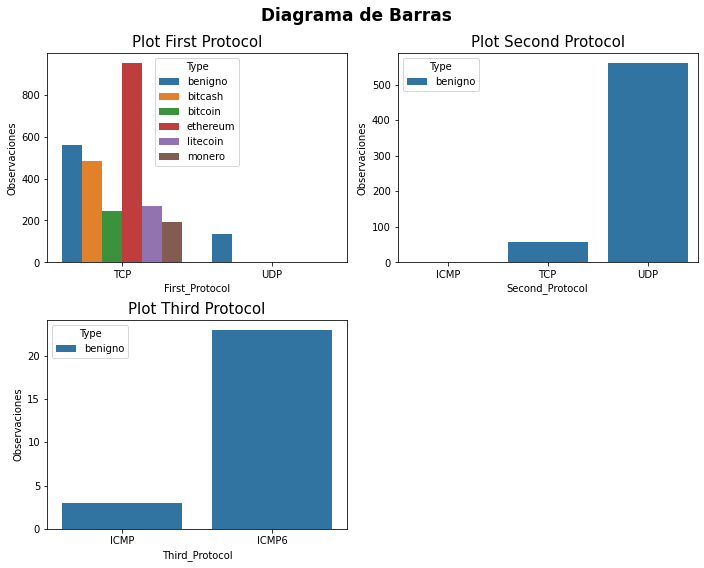

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
ax = ax.flat
sns.barplot(x = first_group.iloc[:,0], y = first_group.iloc[:,2], hue=first_group.iloc[:,1], 
            data=first_group, ax = ax[0])
ax[0].set_title("Plot First Protocol", size = 15)
sns.barplot(x = second_group.iloc[:,0], y = second_group.iloc[:,2], hue=second_group.iloc[:,1], 
            data=second_group, ax = ax[1])
ax[1].set_title("Plot Second Protocol", size = 15)
sns.barplot(x = third_group.iloc[:,0], y = third_group.iloc[:,2], hue=third_group.iloc[:,1], 
           data=third_group, ax=ax[2])
ax[2].set_title("Plot Third Protocol", size = 15)
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Diagrama de Barras', fontsize = 17, fontweight = "bold");
fig.delaxes(ax[3])
plt.show()

---
- En el primer gráfico, se evidencia que el TCP se encuentra presente en los flujos de minería, de manera absoluta, lo cual es acorde al supuesto de que los mineros tienden a usar un protocolo orientado a la conexión, el cual debe verificar la correcta trasmisión, que en este caso sería el host de minería y el minero.

- En la primera gráfica, el protocolo que tiene más presencia es el UDP, protocolo que no suele ser usado por los mineros por su tendencia a perder información. Pero el número de registros es inferior con respecto a la primera gráfica. 

- La ultima gráfica que suele tener un protocolo (ICMP6) de IPv6 que es una nueva versión con respecto a IPV4. El protocolo suele ser asociado a detectar errores, pero tiene un número limitado de registros.  

- Un análisis posterior con variables categóricas con respecto a las variables numéricas es complejo de realizar, pese a que existe cuatro tipos, tres de ellas tiene una incidencia en un tipo de registro (benignas) y solo uno en los mineros que es el primer protocolo. Solo se podria analizar con el tipo de registro. 

---

## **Correlación entre las variables**

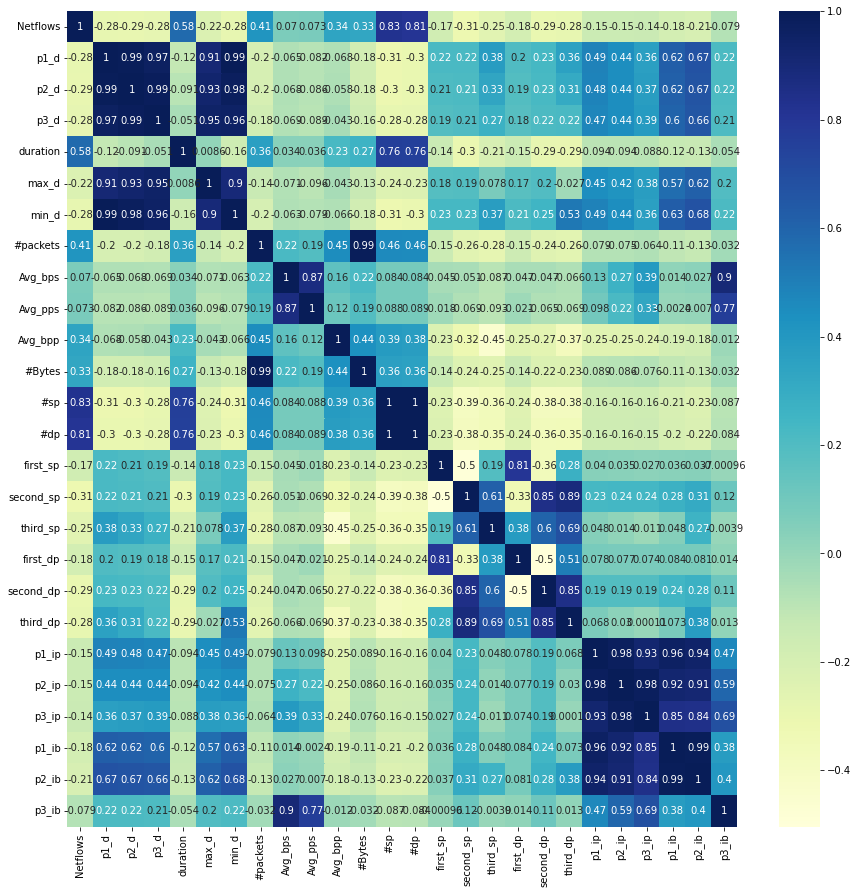

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

El siguiente apartado son notas o preguntas que surgen, tras la visualización de correlación.

**Netflow**

- ¿Entre más tiempo que dura la conexión, más flujos (netflows) puede generar? El hecho de no tener continuidad como una propiedad inherente en las variables de tiempo, puede no generar información congruente.

- ¿La cantidad de flujos puede estar relacionada con los puertos de origen y destino, y a su vez el número de paquetes y bytes en la conexión? Un minero, aunque debe estar conectado a un host minero, no debería producir tantos flujos, debido a la complejidad en la prueba de trabajo.


- El número de puertos puede estar influido también por el número de procesos, tanto del sistema como de otros programas que pudieron estar activos durante la captura de tráfico. No debería tener tanta importancia, y su correlación es válida, pero no para el problema a tratar.



**Variables de tiempo**

- ¿Tiene sentido como se relacionan las variables de tiempo p1_d, p2_d, p3_d, max_d, min_d y duration entre ellas?, cuando esta salen de una variable de origen en el archivo de origen, son de una misma distribución. Consideró una análisis de registros concentrados bajo una curva

- No tienen propiedad inherente de continuidad, tener cuidado el análisis con otra variable.


**Número de paquetes y numero de bytes**
**Cuartiles de número de paquetes y Cuartiles de numero de bytes**

- Un paquete debe contener información en bits o en bytes, formato en los datos que depende de la sonda que analiza la red. Un paquete debe tener un límite en el tamaño de la información. Con respecto a las razones anteriores, el número de bytes o bits debe incidir en el número de paquetes.

- Las variables #packets, Avg_pps, p1_ip, p2_ip y p3_ip provienen de una distribución primaria. Pese a que tiene una relación, no sé si tenga sentido realizar un análisis, debido a que podría presentarse redundancia o sesgar los datos al eliminar columnas. Lo mismo sucede con #Bytes, Avg_bps, Avg_bpp, p1_ib, p2_ib y p3_ib. Aunque lo interessante o anormal es la correlación alta de p3_ib con Avg_bps y Avg_pps.          


**Variables de puertos**
- Los puertos no tendría incidencia debido a que los criptojakers o hackers pueden modificar el puerto a su gusto, además de que diferentes procesos pueden hacer uso de diferentes puertos.

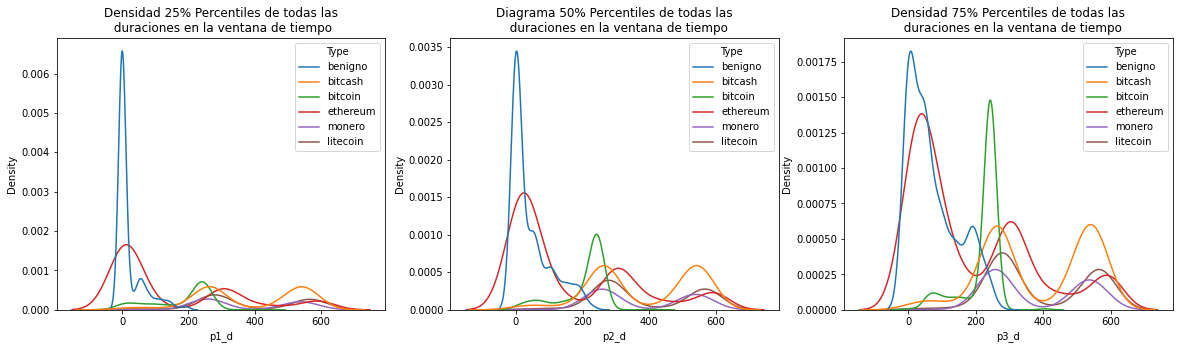

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
ax = ax.flat
sns.kdeplot(x = 'p1_d', data=data, hue='Type', ax = ax[0])
ax[0].set_title("Densidad 25% Percentiles de todas las\n duraciones en la ventana de tiempo", size=12)
sns.kdeplot(x = 'p2_d', data=data, hue='Type', ax = ax[1])
ax[1].set_title("Diagrama 50% Percentiles de todas las\n  duraciones en la ventana de tiempo", size=12)
sns.kdeplot(x = 'p3_d', data=data, hue='Type', ax = ax[2])
ax[2].set_title("Densidad 75% Percentiles de todas las\n  duraciones en la ventana de tiempo", size=12)

plt.show()

---
- El porcentaje de registros parece encontrarse mayoritariamente en el tercer cuartil ('p3_d '), por el area de la curva, que se aprecia en el grafico.
- Un porcentaje de datos de ethereum tiene a estar entre 0 y 190, similar a la concentración de los registros benignos, por lo tanto la probabilidad del minero ethereum de ser encontraro por tiempo estaria entre un rango de 0 y 190.
- La concentración se incrementa de los mineros suele estar entre los 200 y 600 segundos, sin embargo en ethereum decrementa la probabilidad de encontra en este intervalo de tiempo.
- Bitcoin precenta una concentración entre los 200 y 300 segundos, este comportamiento puede deberse a lo costoso de minar está moneda, por lo tanto su ejecución pudo ser limitada.

---

In [ ]:
data_ignore_benigno = data[data['Type']!='benigno']

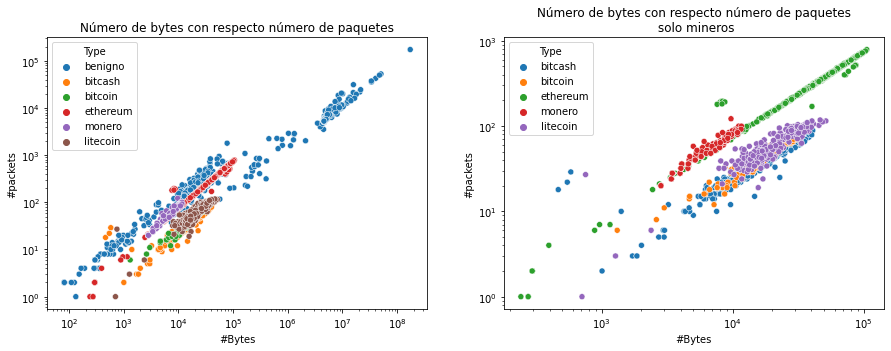

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax = ax.flat

sns.scatterplot(x = "#Bytes", y = "#packets", data = data, hue = 'Type', ax = ax[0]);
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_title('Número de bytes con respecto número de paquetes')

sns.scatterplot(x = "#Bytes", y = "#packets", data = data_ignore_benigno, hue = 'Type', ax = ax[1]);
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_title('Número de bytes con respecto número de paquetes\n solo mineros')
plt.show()

In [ ]:
data_ignore_benigno[data_ignore_benigno['Type']=='monero']['#Bytes'].max()

11668

---
**Primer grafico**
- Hay una correlación directa fuerte entre el número de paquetes y el número de bytes en la mayoría de registros, con pequeñas desviaciones. La relación entre bytes y paquetes de mineria parece ser similar al de trafico normal.

**Segundo grafico**
- Se retira el trafico benigno para visualizar el comportamiento de la actividad minera.

- Los mineros no superan el tamaño de los 105764 bytes por paquetes. En una transacción de 1000 paquetes se ha transferido aproximadamente 105764 bytes de información.

- Monero tiene un comportamineto similara a ethereum entre los rangos de transferencia de información de 2830 y 11668 bytes por paquete. 

- ethereum tiene la relación más fuerte y más prolongada entre los mineros.

- Litecoin, bitcoin y bitcash tiene un comportamiento más similar.

- Bitcash tiene valores atipicos muy alejados del promedio, en comparación a las otras criptomonedas.
---

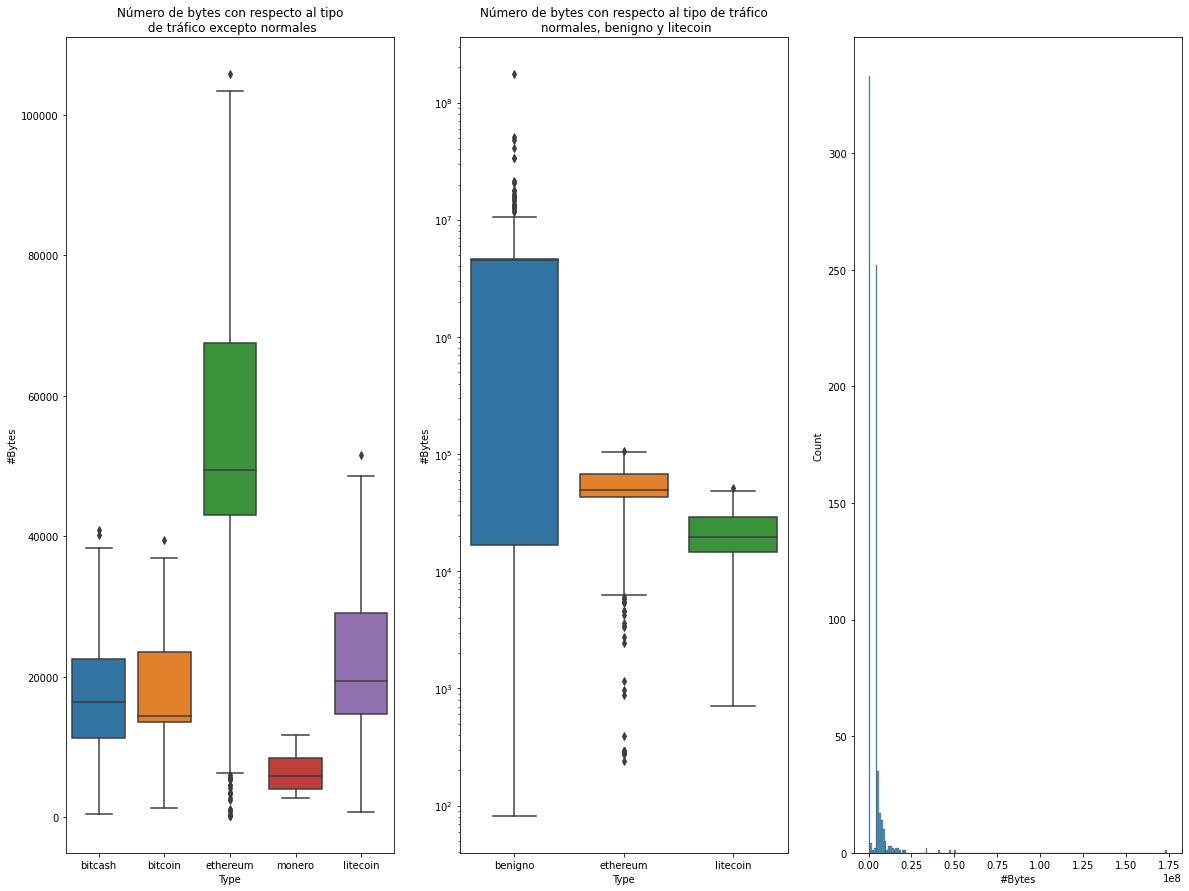

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,15))
ax = ax.flat

sns.boxplot(y = '#Bytes', x= 'Type', data = data_ignore_benigno, ax = ax[0])
ax[0].set_title('Número de bytes con respecto al tipo\n de tráfico excepto normales')


data_temp = data[(data['Type'] =='benigno') | (data['Type'] =='ethereum') | (data['Type'] =='litecoin')]

sns.boxplot(y = '#Bytes', x= 'Type', data = data_temp, ax = ax[1])
ax[1].set_title('Número de bytes con respecto al tipo de tráfico\n normales, benigno y litecoin')
ax[1].set_yscale("log")


sns.histplot(data=data[(data['Type'] =='benigno')], x="#Bytes", ax=ax[2])

plt.show()

- Bitcash tiene una pequeña asimetria positiva
- Bitcoin tiene una asimetria positiva prominente
- Ethereum es la criptomoneada con mayor distribución, y presenta una asimetria hacia la derecha significativa.
- Monero apartir del grafico presenta una ligera asimetria hacia la derecha.
- Bitcash tiene una pequeña asimetria positiva
- Litecoin tiene una asimetria significativa hacia la derecha.
- El promedio de bytes tiende a ser mayor que la mediana.
- La transferencia de bytes de trafico normal tambien tiene una asimetria negativa muy significativa.

---
- Por debajo de los 4000 bytes de las ventanas de tiempo tienden a estar la mayoría de los mineros. Por encima suele estar agrupados los datos normales y de la moneda ethereum.

- Sabiendo que la conexión que se llevó a cabo con los mineros duro entre 5 o menos minutos, podemos suponer que los mineros no pudieron minar la criptomoneda, por lo tanto, el sesgo hacia la derecha podría ser explicado por la negociación de conexión, entre la PC y el host. 




Ahora el archivo de tráfico normal también se tomó durante los cinco minutos y su distribución es más amplia, lo que puede ser explicada por lo siguiente:

1. El host minero solo negocia la conexón del minero insertado en el PC, mientras que el del tráfico normal, puede que halla transferencia de información por los diversos servicios y componentes que pudieran estar instalados en su momento en el sitio web, que se pudieron trasmitir en menor proporción pero masivamente.

2. La carga de información trasmitida por los mineros pudieron ser en grandes proporciones, pero en menor medida, tal vez pudo ser la transferencia de la prueba de trabajo.
---

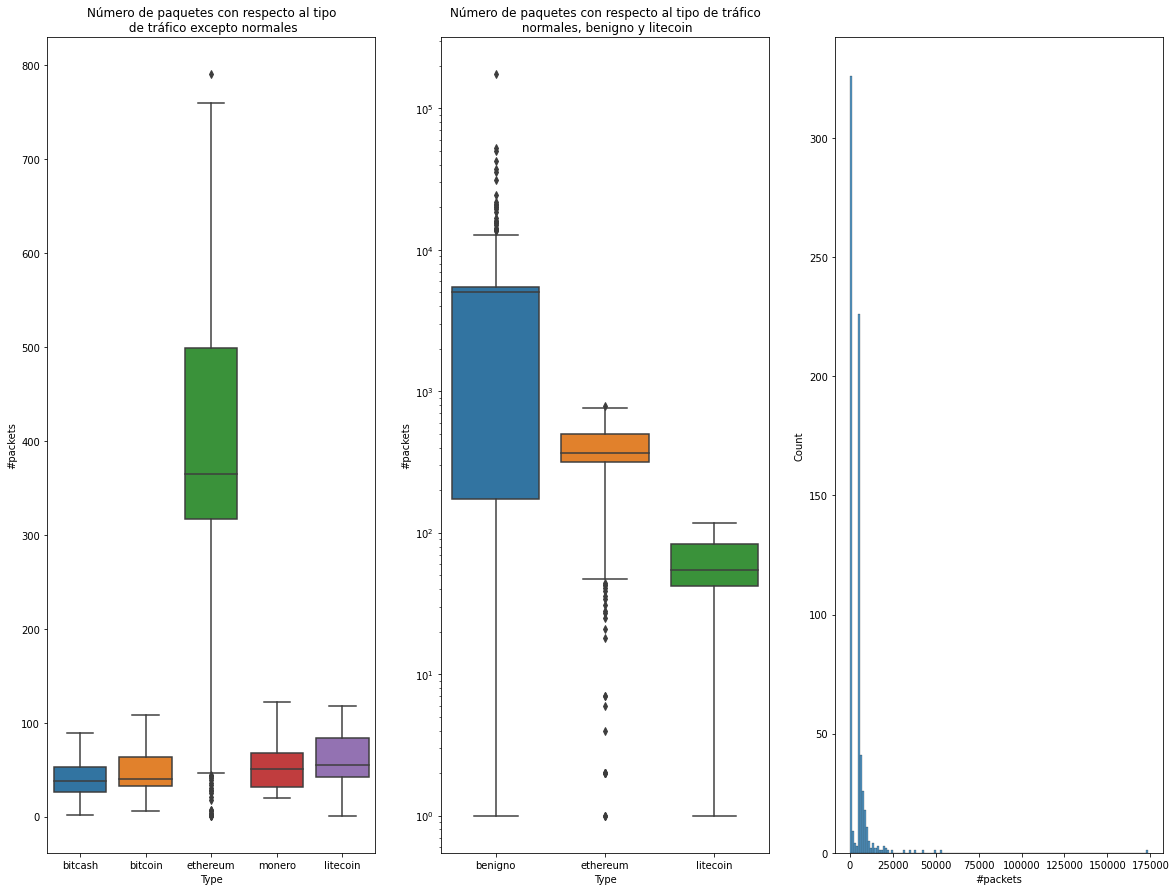

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,15))
ax = ax.flat

sns.boxplot(y = '#packets', x= 'Type', data = data_ignore_benigno, ax = ax[0])
ax[0].set_title('Número de paquetes con respecto al tipo\n de tráfico excepto normales')

sns.boxplot(y = '#packets', x= 'Type', data = data_temp, ax = ax[1])
ax[1].set_title('Número de paquetes con respecto al tipo de tráfico\n normales, benigno y litecoin')
ax[1].set_yscale("log")


sns.histplot(data=data[(data['Type'] =='benigno')], x="#packets", ax=ax[2])


plt.show()

- Bitcash tiene una pequeña asimetria positiva
- Bitcoin tiene una asimetria positiva prominente
- Ethereum es la criptomoneada con mayor distribución, y presenta una asimetria hacia la derecha significativa.
- Monero apartir del grafico presenta una ligera asimetria hacia la izquierda.
- Bitcash tiene una pequeña asimetria positiva
- Litecoin tiene una asimetria significativa hacia la derecha.
- El promedio de paquetes tiende a ser mayor que la mediana.
- La transferencia de paquetes tambien tiene una asimetria negativa muy significativa.

---
- Por debajo de los 170 paquetes de las ventanas de tiempo tienden a estar la mayoría de los mineros. Por encima suele estar agrupados los datos normales y de la moneda ethereum.

- La cantidad de paquetes parece estar relacionado con la trasmisión de bytes, esto se pudo ver en los gráficos de dispersión. En tráfico minero, la trasmisión de grandes cantidades de bytes requieren mayor uso de paquetes.
---

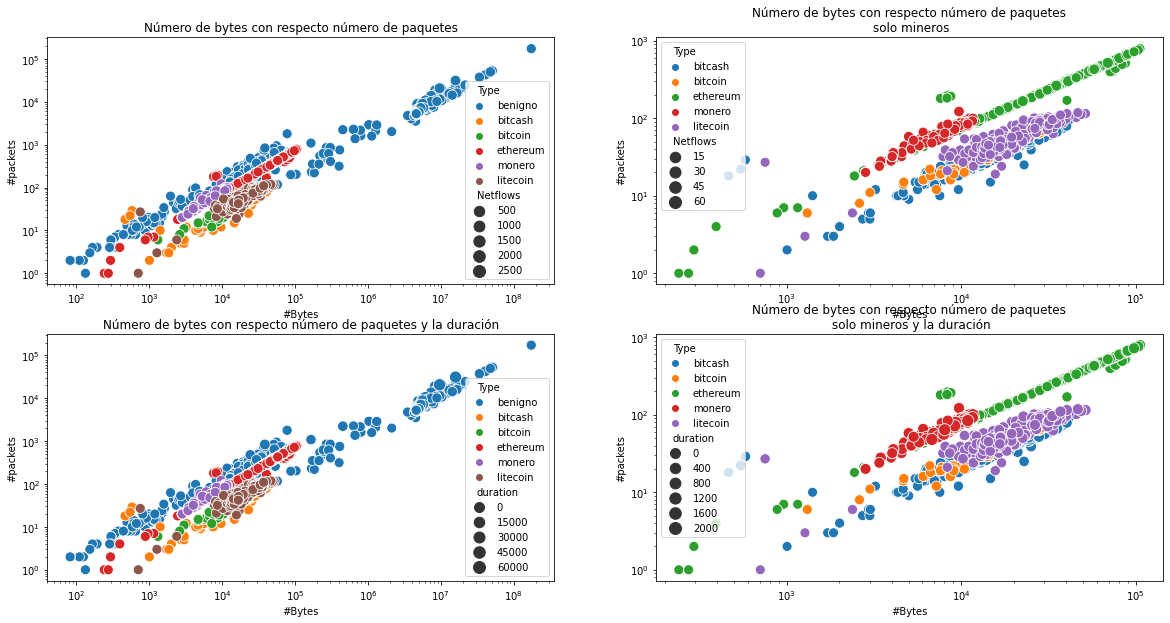

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))
ax = ax.flat

sns.scatterplot(x = "#Bytes", y = "#packets", data = data, hue = 'Type', size="Netflows", ax = ax[0], sizes = (100, 150));
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_title('Número de bytes con respecto número de paquetes')

sns.scatterplot(x = "#Bytes", y = "#packets", data = data_ignore_benigno, hue = 'Type',size="Netflows", ax = ax[1], sizes = (100, 150));
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_title('Número de bytes con respecto número de paquetes\n solo mineros')


sns.scatterplot(x = "#Bytes", y = "#packets", data = data, hue = 'Type', size="duration", ax = ax[2], sizes = (100, 150));
ax[2].set_xscale("log")
ax[2].set_yscale("log")
ax[2].set_title('Número de bytes con respecto número de paquetes y la duración')

sns.scatterplot(x = "#Bytes", y = "#packets", data = data_ignore_benigno, hue = 'Type', size="duration", ax = ax[3], sizes = (100, 150));
ax[3].set_xscale("log")
ax[3].set_yscale("log")
ax[3].set_title('Número de bytes con respecto número de paquetes\n solo mineros y la duración')

plt.show()

**Número de bytes con respecto número de paquetes y duración total**

- La duración de la ventana no es muy influyente en la relación del #paquetes y #bytes.

**Número de bytes con respecto número de paquetes y duración total\n solo mineros**

- La variable de tiempo solo tiene incidencia en el trafico de Monero, sin embargo no es suficiente para indicar que está variable influye en la relación de paquetes y bytes.


**dos ultimas graficas**
- Se aprecia que la representación es similar a la anterior y que el numero de flujos no es muy incidente. 